## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

## HW1

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [3]:
iris.data.shape

(150, 4)

### 調整參數

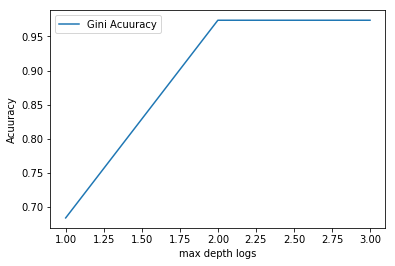

In [8]:
import numpy as np

max_depth = [1, 2, 3]
gini_acc = []

for depth in max_depth:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_split=3, min_samples_leaf=3)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    gini_acc.append(metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

# 將結果繪圖
plt.plot((np.array(max_depth)),
         gini_acc, label="Gini Acuuracy")

plt.ylabel("Acuuracy")
plt.xlabel("max depth logs")
plt.legend()


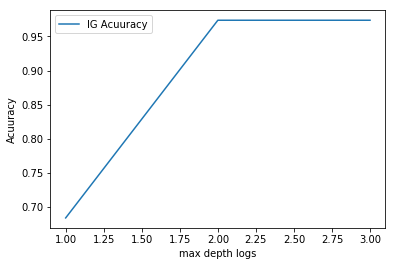

In [11]:
import numpy as np

max_depth = [1, 2, 3]
gini_acc = []

for depth in max_depth:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_split=3, min_samples_leaf=3)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    gini_acc.append(metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

# 將結果繪圖
plt.plot((np.array(max_depth)),
         gini_acc, label="IG Acuuracy")

plt.ylabel("Acuuracy")
plt.xlabel("max depth logs")
plt.legend()

## HW 2

In [13]:
boston_housing = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston_housing.data, boston_housing.target, test_size=0.25, random_state=4)

# 建立模型
rlf = DecisionTreeRegressor()
rlf.fit(x_train, y_train)
y_pred = rlf.predict(x_test)

score = metrics.r2_score(y_test, y_pred)
print("r2_score: ", score)

r2_score:  0.7132328173585746


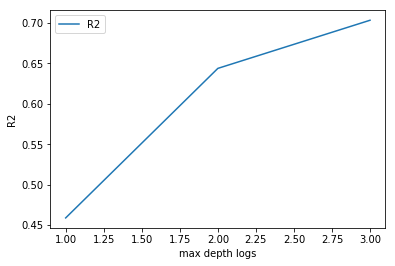

In [17]:
max_depth = [1, 2, 3]
gini_r2 = []

for depth in max_depth:
    rlf = DecisionTreeRegressor(max_depth=depth, min_samples_split=3, min_samples_leaf=3)
    rlf.fit(x_train,y_train)
    y_pred = rlf.predict(x_test)
    gini_r2.append(metrics.r2_score(y_test, y_pred))

import matplotlib.pyplot as plt

# 將結果繪圖
plt.plot((np.array(max_depth)),
         gini_r2, label="R2")

plt.ylabel("R2")
plt.xlabel("max depth logs")
plt.legend()